# Train 데이터 모델링

In [3]:
import pandas as pd
from datetime import datetime

perform_df = pd.read_json('datas/raw_data/raw_perform.json')
rating_df = pd.read_json('datas/raw_data/raw_rating.json')

# Datetime으로 변환
perform_df.dropna(inplace=True)

perform_df['방송일시'] = list(map(lambda i : datetime.fromtimestamp(i/1000), perform_df['방송일시']))
perform_df['판매단가'] = list(map(lambda i : int(i.replace(',','')) if i != None else None, perform_df['판매단가']))
perform_df[' 취급액 '] = list(map(lambda i : int(i.replace(',','')) if i != None else None, perform_df[' 취급액 ']))



In [178]:
perform_df['시간대'] = list(map(lambda i : i.time().hour, perform_df['방송일시']))


In [179]:
perform_df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균시청률,의류,...,주방,농수축,이미용,가전,생활용품,건강기능,잡화,가구,침구,시간대
0,2019-01-01 15:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,0.008714,1,...,0,0,0,0,0,0,0,0,0,15
1,2019-01-01 15:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,0.008714,1,...,0,0,0,0,0,0,0,0,0,15
2,2019-01-01 15:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,0.012286,1,...,0,0,0,0,0,0,0,0,0,15
3,2019-01-01 15:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,0.012286,1,...,0,0,0,0,0,0,0,0,0,15
4,2019-01-01 15:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,0.011429,1,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,2019-12-31 22:00:00,20,100837,202480,일시불 쿠쿠전기밥솥 10인용 (QS),주방,208000,28898000,0.000571,0,...,0,0,0,0,0,0,0,0,0,22
38241,2019-12-31 22:00:00,20,100837,202470,무이자 쿠쿠전기밥솥 6인용(QS),주방,208000,5527000,0.000571,0,...,0,0,0,0,0,0,0,0,0,22
38242,2019-12-31 22:00:00,20,100837,202473,일시불 쿠쿠전기밥솥 6인용(QS),주방,198000,11220000,0.000571,0,...,0,0,0,0,0,0,0,0,0,22
38244,2019-12-31 23:20:00,20,100378,201235,베지밀 검은콩 두유 96팩,건강기능,50900,18427000,0.000000,0,...,0,0,0,0,0,0,0,0,0,23


In [5]:
from datetime import timedelta

In [6]:
rating_df.set_index('시간대', inplace=True)

In [7]:
perform_df = perform_df[perform_df['방송일시'] < datetime(2020,1,1)]

In [9]:
rating_df.loc['24:00'] = rating_df.loc['00:00']

In [10]:
# 이전날짜 것으로 변경하면 같은날짜 24:00 으로 찾기 가능
rating_df.loc['24:00'][:-1] = rating_df.loc['00:00'][1:]

In [168]:
rating_df.loc[['24:00','00:00']][:]

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
24:00,0.04,0.00,0.0,0.0,0.0,0.0,0.015,0.000,0.0,0.0,...,0.013,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.024,0.000
00:00,0.00,0.04,0.0,0.0,0.0,0.0,0.000,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.024


In [11]:
# 확인용
rating_df.loc[['00:00', '24:00']]

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
00:00,0.00,0.04,0.0,0.0,0.0,0.0,0.000,0.015,0.0,0.0,...,0.000,0.013,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.024
24:00,0.04,0.00,0.0,0.0,0.0,0.0,0.015,0.000,0.0,0.0,...,0.013,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.024,0.024


In [12]:
perform_df['평균시청률'] = list(map(lambda i : rating_df[str(i['방송일시'])[:10]][str(i['방송일시'])[11:16]:str(i['방송일시'] + timedelta(minutes = int(i['노출(분)'])))[11:16]].mean(), perform_df.iloc))

In [13]:
perform_df.dropna(inplace=True)

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [14]:
c_feature = perform_df['상품군'].unique()

In [15]:
for c in c_feature:
    perform_df[c] = 0 

In [16]:
category = list(perform_df['상품군'])

In [17]:
for i,c in enumerate(category):
    perform_df[c][i] = 1

In [18]:
perform_df.dropna(inplace=True)

In [182]:
features = ['노출(분)','판매단가','평균시청률','시간대']
features.extend(list(c_feature))

In [183]:
perform_df[features].isnull().sum()

노출(분)    0
판매단가     0
평균시청률    0
시간대      0
의류       0
속옷       0
주방       0
농수축      0
이미용      0
가전       0
생활용품     0
건강기능     0
잡화       0
가구       0
침구       0
dtype: int64

In [184]:
perform_df[features]

,노출(분),판매단가,평균시청률,시간대,의류,속옷,주방,농수축,이미용,가전,생활용품,건강기능,잡화,가구,침구
0,20,39900,0.008714,15,1,0,0,0,0,0,0,0,0,0,0
1,20,39900,0.008714,15,1,0,0,0,0,0,0,0,0,0,0
2,20,39900,0.012286,15,1,0,0,0,0,0,0,0,0,0,0
3,20,39900,0.012286,15,1,0,0,0,0,0,0,0,0,0,0
4,20,39900,0.011429,15,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,20,208000,0.000571,22,0,0,0,0,0,0,0,0,0,0,0
38241,20,208000,0.000571,22,0,0,0,0,0,0,0,0,0,0,0
38242,20,198000,0.000571,22,0,0,0,0,0,0,0,0,0,0,0
38244,20,50900,0.000000,23,0,0,0,0,0,0,0,0,0,0,0


In [185]:
import numpy as np
X_datas = np.matrix(perform_df[features])

In [186]:
y_datas = np.array(perform_df[' 취급액 '])

In [187]:
y_datas

array([ 2099000,  4371000,  3262000, ..., 11220000, 18427000, 28317000],
      dtype=int64)

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_datas, y_datas, test_size=0.2, shuffle=True)

In [184]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
y_pred = lr.predict(X_test)

In [195]:
error = y_pred-y_test

In [ ]:
# 평균시청률은 단위가 낮아서 그런지 크게 영향을 미치지 않는 느낌

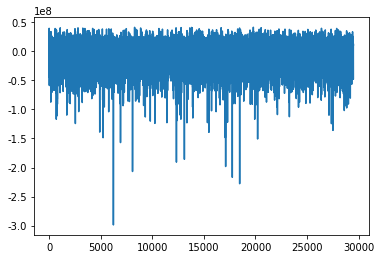

In [196]:
import matplotlib.pyplot as plt

plt.plot(error)

In [197]:
lr.score(X_test, y_test)

0.2080823701005191

# 딥러닝 모델로 변경 필요 어떤 모델?

In [1]:
from sklearn.neural_network import MLPRegressor

# 다층 퍼셉트론은 안 맞는 듯

In [47]:
mlp = MLPRegressor(hidden_layer_sizes = (100, 70, 50), max_iter= 1000).fit(X_train, y_train)

In [48]:
mlp

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 70, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [49]:
error = y_train - mlp.predict(X_train)

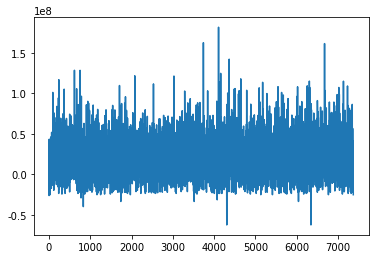

In [50]:
plt.plot(error)

In [51]:
mlp.score(X_train, y_train)

-1.0553089707624395

In [157]:
X_train.shape

(29489, 14)

In [158]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [159]:
X_train

matrix([[2.00000000e+01, 7.90000000e+04, 7.14285714e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 1.48000000e+05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 4.99000000e+04, 1.00000000e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.00000000e+01, 5.99000000e+04, 1.80952381e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 5.90000000e+04, 3.60476190e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 1.33000000e+06, 2.47619048e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [125]:
train_data = pd.DataFrame(X_train)

In [95]:
train_stats

,count,mean,std,min,25%,50%,75%,max
0,7372.0,20.341427,3.038835,3.0,20.0,20.000000,20.000000,3.000000e+01
1,7372.0,474157.107976,742074.298728,24900.0,59800.0,118000.000000,539000.000000,7.930000e+06
2,7372.0,0.003768,0.007132,0.0,0.0,0.000857,0.004048,8.347619e-02
3,7372.0,0.005019,0.070672,0.0,0.0,0.000000,0.000000,1.000000e+00
4,7372.0,0.002306,0.047969,0.0,0.0,0.000000,0.000000,1.000000e+00
5,7372.0,0.002984,0.054551,0.0,0.0,0.000000,0.000000,1.000000e+00
6,7372.0,0.000814,0.028519,0.0,0.0,0.000000,0.000000,1.000000e+00
7,7372.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
8,7372.0,0.003256,0.056968,0.0,0.0,0.000000,0.000000,1.000000e+00
9,7372.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00


In [96]:
train_stats = train_data.describe()
# train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
0,7372.0,20.341427,3.038835,3.0,20.0,20.000000,20.000000,3.000000e+01
1,7372.0,474157.107976,742074.298728,24900.0,59800.0,118000.000000,539000.000000,7.930000e+06
2,7372.0,0.003768,0.007132,0.0,0.0,0.000857,0.004048,8.347619e-02
3,7372.0,0.005019,0.070672,0.0,0.0,0.000000,0.000000,1.000000e+00
4,7372.0,0.002306,0.047969,0.0,0.0,0.000000,0.000000,1.000000e+00
5,7372.0,0.002984,0.054551,0.0,0.0,0.000000,0.000000,1.000000e+00
6,7372.0,0.000814,0.028519,0.0,0.0,0.000000,0.000000,1.000000e+00
7,7372.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00
8,7372.0,0.003256,0.056968,0.0,0.0,0.000000,0.000000,1.000000e+00
9,7372.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00


In [118]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,20.0,2690000.0,0.001143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,39000.0,0.008750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,49800.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,138000.0,0.011905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,2549000.0,0.000161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,20.0,43900.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7368,20.0,1989000.0,0.009333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7369,20.0,29900.0,0.001905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7370,20.0,208000.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
# normed_test_data = norm(X_test)

In [82]:
X_train.shape

(7372, 14)

In [100]:
normed_train_data.dropna(axis= 1, inplace=True)

In [98]:
normed_train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.112355,2.986012,-0.368009,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
1,-1.757722,-0.586406,0.698565,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
2,-0.112355,-0.571853,-0.528246,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
3,-0.112355,-0.452997,1.140885,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
4,3.178380,2.796004,-0.505632,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,-0.112355,-0.579803,-0.528246,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
7368,-0.112355,2.041363,0.780353,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
7369,-0.112355,-0.598669,-0.261185,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376
7370,-0.112355,-0.358666,-0.528246,-0.071018,-0.048073,-0.054706,-0.028538,NaN,-0.057147,NaN,-0.054706,-0.05594,-0.028538,-0.040376


12

In [196]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[15]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [197]:
model = build_model()

In [198]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                1024      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


In [199]:
X_train

matrix([[2.00000000e+01, 4.00000000e+05, 7.42857143e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 1.78000000e+05, 2.90000000e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 2.50000000e+06, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.00000000e+01, 1.89900000e+06, 3.14285714e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 9.49000000e+05, 1.71428571e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+01, 6.90000000e+04, 1.21904762e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [200]:
history = model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.2, verbose=0)

In [201]:
pred = model.predict(X_train)

In [202]:
y_train

array([ 2825000,  9970000,    50000, ...,    50000, 19276000, 22192000],
      dtype=int64)

In [203]:
pred

array([[22642770.],
       [21069488.],
       [30078554.],
       ...,
       [25049164.],
       [19115262.],
       [24191016.]], dtype=float32)

In [243]:
test_raw = pd.read_json('datas/test_data/forecast.json')
# test_datas

In [213]:
test_datas = test_datas[test_datas['상품군'] != '무형']

In [215]:
test_datas

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 15:20:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
1,2020-06-01 15:40:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
2,2020-06-01 16:00:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,"59,800",NaN
3,2020-06-01 16:20:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN
4,2020-06-01 16:40:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,"69,900",NaN
...,...,...,...,...,...,...,...,...
2883,2020-07-01 09:10:00,10,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,"99,000",NaN
2884,2020-07-01 09:10:00,10,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,"119,000",NaN
2885,2020-07-01 09:10:00,10,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,"119,000",NaN
2889,2020-07-01 10:20:00,20,100261,200875,아놀드파마 티셔츠레깅스세트,의류,"69,900",NaN


In [220]:
# test_datas['방송일시'] = list(map(lambda i : datetime.fromtimestamp(i/1000), test_datas['방송일시']))
# test_datas['판매단가'] = list(map(lambda i : int(i.replace(',','')) if i != None else None, test_datas['판매단가']))

In [221]:
test_datas

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 15:20:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 15:40:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 16:00:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 16:20:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 16:40:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
...,...,...,...,...,...,...,...,...
2883,2020-07-01 09:10:00,10,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,NaN
2884,2020-07-01 09:10:00,10,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,NaN
2885,2020-07-01 09:10:00,10,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,NaN
2889,2020-07-01 10:20:00,20,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN


In [225]:
c_feature = test_datas['상품군'].unique()

In [226]:
for c in c_feature:
    test_datas[c] = 0 

In [ ]:
features = ['노출(분)','판매단가','평균시청률','시간대']
features.extend(list(c_feature))

In [227]:
test_datas['시간대'] = list(map(lambda i : i.time().hour, test_datas['방송일시']))

In [231]:
test_datas['평균시청률'] = 0

In [236]:
forecast = np.matrix(test_datas[features])

In [233]:
test_datas.drop('취급액', axis=1,inplace=True)

In [238]:
for_pred = model.predict(forecast)

In [239]:
test_datas['취급액'] = for_pred

In [241]:
test_datas.to_csv('datas/result_data/result.csv')

In [245]:
test_raw['취급액'] = test_datas['취급액']

In [248]:
test_raw.fillna(0).to_csv('datas/result_data/result.csv')

In [242]:
test_datas

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,의류,속옷,이미용,...,농수축,가전,생활용품,가구,잡화,건강기능,침구,시간대,평균시청률,취급액
0,2020-06-01 15:20:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,0,0,0,...,0,0,0,0,0,0,0,15,0,20603120.0
1,2020-06-01 15:40:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,0,0,0,...,0,0,0,0,0,0,0,15,0,20603120.0
2,2020-06-01 16:00:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,0,0,0,...,0,0,0,0,0,0,0,16,0,22147480.0
3,2020-06-01 16:20:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,0,0,0,...,0,0,0,0,0,0,0,16,0,23482258.0
4,2020-06-01 16:40:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,0,0,0,...,0,0,0,0,0,0,0,16,0,23482258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,2020-07-01 09:10:00,10,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,0,0,0,...,0,0,0,0,0,0,0,9,0,10387869.0
2884,2020-07-01 09:10:00,10,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,0,0,0,...,0,0,0,0,0,0,0,9,0,12274686.0
2885,2020-07-01 09:10:00,10,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,0,0,0,...,0,0,0,0,0,0,0,9,0,12274686.0
2889,2020-07-01 10:20:00,20,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,0,0,0,...,0,0,0,0,0,0,0,10,0,20021652.0


In [204]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

231/231 - 0s - loss: 412829169483776.0000 - mae: 15600297.0000 - mse: 412829169483776.0000
테스트 세트의 평균 절대 오차: 15600297.00 MPG


In [141]:
pred = model.predict(X_train)

In [174]:
np.mean(y_train-pred)

1216789.2962969244

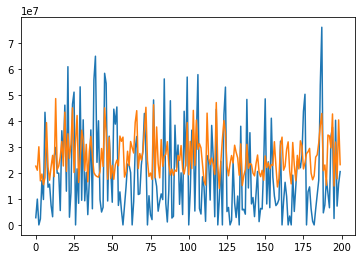

In [205]:
plt.plot(y_train[:200])
plt.plot(pred[:200])
plt.show()

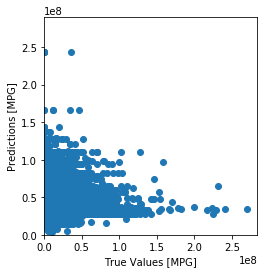

In [138]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


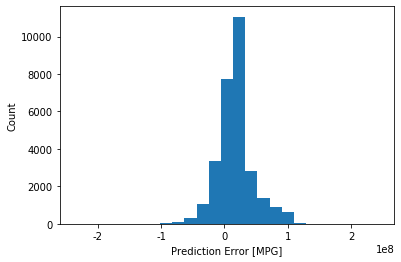

In [139]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

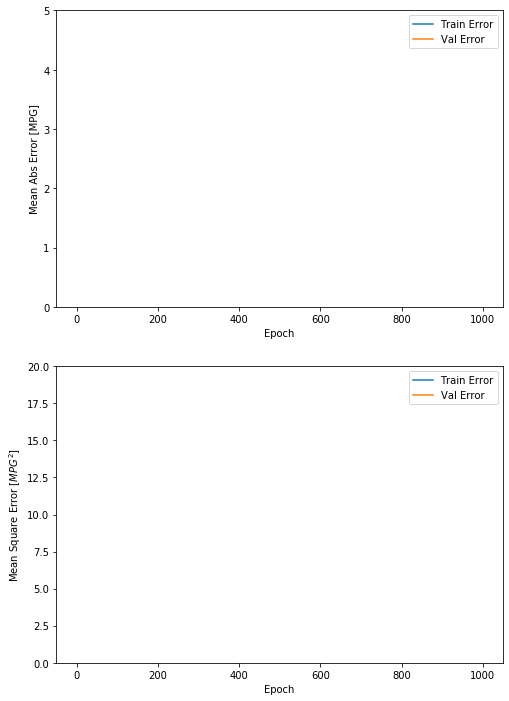

In [140]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [198]:
# 피처 튜닝
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [199]:
model = keras.Sequential([
    keras.layers.Layer(input_shape=(X_train.shape)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)